# 4.3 Discrete time FIR filters

Now that we understand discrete time and how we can transform it to the frequency domain,  
we can look at discrete linear time invariant (dlti) systems  
  
The most simple of these is the finite impulse response, or FIR filter  

## 4.3.1 Continuous time transfer function - review

Before we look at discrete time filters (dlti systems), let's take a moment to briefly review continuous time filters  
A continuous time filter is linear time-invariant (lti) system described by a transfer function  
We have learned that the system could be mechanical, thermal, or fluid flow, but most of the time filters refer to electrical systems  
  
A transfer function describes the relationship between an input signal, $X$, and an output signal, $Y$  
![image1!](./images_s4/image_4_3_1.png)  
The transfer function can only be expressed in the frequency domain  
The counterpart to the transfer function in the time domain is convolution  

In previous chapters, we studied a very common type of filter; the first-order low-pass RC circuit  
The transfer function only depends on the properties of the system and for the RC filter, the transfer function is  
![image2!](./images_s4/image_4_3_2.png)  
The input voltage is typically derived from a sensor and the filtered output voltage can be measured on an oscilloscope  
  
To test a filter, we often use a step voltage for the input  
We have used the Python Scipy lti library to do this many times

### 4.3.1.1 Continuous time step repsonse

TransferFunctionContinuous(
array([1000.]),
array([   1., 1000.]),
dt: None
)


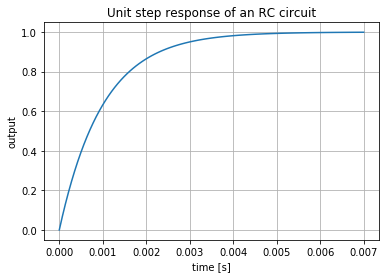

In [1]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

R = 10e3 # Ohms
C = 100e-9 # Farads

num = [1/(R*C)]
den = [1, 1/(R*C)]

H_s = sig.lti(num, den)
print(H_s)

t, y = H_s.step()

plt.plot(t, y)
plt.xlabel('time [s]')
plt.ylabel('output')
plt.title('Unit step response of an RC circuit')
plt.grid()

You can see how the filter takes time to respond to the unit step input's instantaneous change  
  
For filters we are also concerned about their frequency response  
In other words, how do they respond to various frequency input steady-state sin/cos waves  
We use a Bode plot to observe the magnitude of the output of the filter versus input frequency

### 4.3.1.2 Continuous time Bode plot

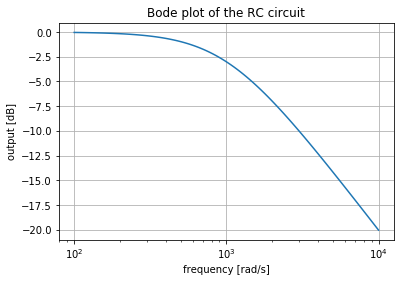

In [2]:
w, mag, phase = H_s.bode()

plt.plot(w, mag)
plt.xscale('log')
plt.xlabel('frequency [rad/s]')
plt.ylabel('output [dB]')
plt.title('Bode plot of the RC circuit')
plt.grid()

You can see in the Bode plot, that the -3dB point is at the natural frequcny of the system, 1000 rad/sec,  
which equals one over the time constant $\alpha=\frac{1}{\tau}$ (remember, the natural frequency, or pole, is actually negative)

### 4.3.1.3 Continuous time poles and zeros

We have also learned that the transfer function can be completely described  
by the location of the poles and zeros (along with the system gain)  
So, engineers often refer to the filter just by the location of the poles and zeros on the s-plane  
For this example RC filter, low-pass means the zero is at $s\rightarrow\infty$  
and the pole is at $s=-1000$ [Np/s]  

In [3]:
print('zeros: ', H_s.zeros)
print('poles: ', H_s.poles)

zeros:  []
poles:  [-1000.]


## 4.3.2 Discrete time transfer function

The discussion above is the same for discrete time systems  
We will find transfer functions that describe the relationship between input signal, $X$, and output signal, $Y$  
Discrete time transfer functions must be expressed using the complex normalized discrete time frequency, $z$  
and cannot be computed in the discrete time domain  
![image3!](./images_s4/image_4_3_3.png)  
When solving a discrete time system, the same actions apply as for a continuous time system  
If you want to compute an output signal,
1. Find the transfer function, $H(z)$  
2. Find the z-transform of the input, $X(z)=\mathcal{Z}\left\{x[k]\right\}$  
3. Multiply the transfer function by the input to compute the output $Y(z)=H(z)X(z)$  
4. Find the inverse z-transform of the output for an indexed set of output points, $y[k]=\mathcal{Z}^{-1}\left\{Y(z)\right\}$    
  
Python Scipy has classes to handle discrete time systems, just as it did for continuous time systems  

### 4.3.2.1 Averaging - a FIR filter is the same as averaging

The acronym FIR stands for finite impulse response  
Later, we will learn to "model" or approximate continuous time filters using discrete time systems,  
The continuous time "models" are called IIR filters, for infinite impulse response  
When you apply an impulse input to a continuous or IIR system, the output will decay exponentially to zero  
but, mathmatically will never reach zero until $t\rightarrow\infty$  
The output of a FIR filter will quickly become exactly zero when driven by an impulse, thus finite impulse response  
  
The FIR filter is a completely digital construct and has no analog or continuous time counterpart  

Very often, when one first samples a signal, they want to average to remove the noise  
The moving average is a FIR filter  
Let's design a filter where the output is the average of the current sample and the 4 previous samples  
Assume X is the input and Y is the output.  The input is usually measured by an ADC (analogRead) on Arduino  
The bracketed terms, k, k-1, k-2, k-3, and k-4, refer to the input signal at subsequently delayed discrete moments in time 
  
$$Y[k]=\frac{X[k]+X[k-1]+X[k-2]+X[k-3]+X[k-4]}{5}$$  
We can find the transfer function for the filter simply by finding the z-transform  
When the input signal is transformed to the complex frequency domain, we write it as $X(z)$  
If you look at the z-transform table from the previous chapter, we multiply by $z^{-1}$ to delay by one sample period  
So, $X(z)z^{0}$ is the current sample and $X(z)z^{-1}$ is the previous sample, and so on  
The z-transform of the equation above becomes  
  
$$Y(z)=\frac{X(z)+X(z)z^{-1}+X(z)z^{-2}+X(z)z^{-3}+X(z)z^{-4}}{5}$$  
solve for the transfer function by writing the output over the input in the frequency domain  
  
$$H(z)=\frac{Y(z)}{X(z)}=\frac{1+z^{-1}+z^{-2}+z^{-3}+z^{-4}}{5}$$  
In the tradition of the continuous time transfer function, we will write it as a polynomial over a polynomial  
and we will make the highest order coefficient in the denominator equal to one  
multiply by $\frac{z^4}{z^4}$ and $\frac{0.2}{0.2}$  
  
$$H(z)=\frac{Y(z)}{X(z)}=\frac{0.2z^4+0.2z^3+0.2z^2+0.2z+0.2}{z^4}$$  
Now that we have found the transfer function for the FIR filter,  
we can represent it graphically showing the input and output signals as a function of frequency  
  
![image4!](./images_s4/image_4_3_4.png)  

### 4.3.2.2 Discrete time step response

Following the same approach as we did for the review of continuous time filters above,  
we will find the unit step response of the FIR filter  
  
A discrete linear time invariant system is entered in Scipy with the dlti method  
[dlti](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlti.html)  

TransferFunctionDiscrete(
array([0.2, 0.2, 0.2, 0.2, 0.2]),
array([1., 0., 0., 0., 0.]),
dt: True
)


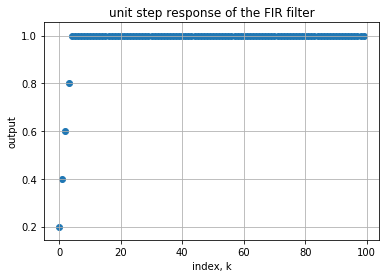

In [4]:
num = [0.2, 0.2, 0.2, 0.2, 0.2]
den = [1, 0, 0, 0, 0] # don't forget the zeros

H_z = sig.dlti(num, den)
print(H_z)

k, y = H_z.step()

plt.scatter(k, y)
plt.xlabel('index, k')
plt.ylabel('output')
plt.title('unit step response of the FIR filter')
plt.grid()

Scipy defaults to computing 100 points  
We can change the number of points, by entering a range for the index  
Scipy considers it's range as an amount of time rather than indices,  
even though time does not play a role in the calculation  
Indices are the only thing that matter to the calculation, but time is used to scale the x-axis  
  
When we created the dlti system above, we did not specify a sampling period  
You can specify a sampling period by entering the parameter, $dt$  
If you do not specify, $dt$, then it will default to $dt=1$ second  
When $dt=1$, you could consider the values as indices rather than time  
  
Notice in the printed out transfer function, that $dt$ is set to True  
If $dt$ is True, then the method is assuming $dt=1$  
If $dt$ has a value, such as $dt=0.1$, then the method will assume a system with that sampling period  
  
The sampling period of the time array must match the sampling period of the dlti system  
or Scipy will try to interopolate the values to match the system's sampling rate  
The code cell below changes the sampling period of the system to 1000 samples/sec  
[dstep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dstep.html#scipy.signal.dstep)

TransferFunctionDiscrete(
array([0.2, 0.2, 0.2, 0.2, 0.2]),
array([1., 0., 0., 0., 0.]),
dt: 0.001
)


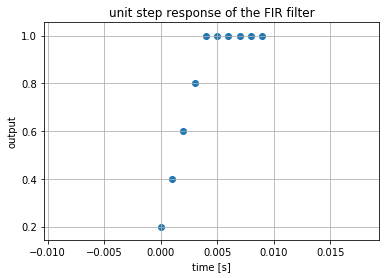

In [5]:
H_z = sig.dlti(num, den, dt=0.001)
print(H_z)

# Make the time array step size match the sampling rate
# Make a short time array so you can see the first few points
t = np.arange(0, 0.01, 0.001)
t, y_t = H_z.step(t=t)

plt.scatter(t, y_t)
plt.xlabel('time [s]')
plt.ylabel('output')
plt.title('unit step response of the FIR filter')
plt.grid()

You can see the moving average in action  
The first point is the avarage of $1+0+0+0+0$, because the unit step is zero for all values of $t<0$ really ($k<0$)  
The unit step becomes 1 at index $k=0$ or ($t=0$) and remains 1 for all indices $k>0$ ($t>0$)  
The second point is the average of $1+1+0+0+0$, and this continues until the fifth point when five previous values equal 1  
so the average becomes 1  

### 4.3.2.3 Discrete time Bode plot

The Bode plot for the FIR filter can be calculated for frequencies between 0 and half the sampling rate  
The discrete time Bode plot method can be confusing because it will not return frequencies great than half the sampling rate  
You can pass in an array of frequencies to control the Bode plot, but the units of the array are NOT radians/sec  
To keep things simple, we will not pass in a parameter for the frequency array  
The method will return a frequency array up to half the sampling rate, 500Hz, or 3142 [rad/sec]  
calibrated in radians per second because our system has $dt=0.001$  
[dbode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dbode.html)

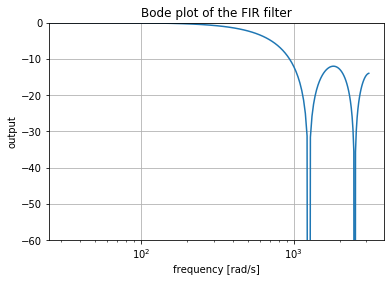

In [6]:
w, mag, phase = H_z.bode()

plt.plot(w, mag)
plt.xscale('log')
plt.ylim([-60, 0])
plt.xlabel('frequency [rad/s]')
plt.ylabel('output')
plt.title('Bode plot of the FIR filter')
plt.grid()

### 4.3.2.4 Discrete time poles and zeros

Poles and zeros exist for discrete time systems, just as they do for continuous time systems  
Poles are the values of $z$ that cause the denominator of the transfer function to be zero  
the transfer function blows up to infinity, when $z$ equals a pole frequency  
Zeros are the values of $z$ that cause the numerator to be zero  
In a transfer function, the number of poles will equal the number of zeros,  
if you count all of the poles and zeros as $z\rightarrow\infty$  
  
You can see the moving average is a low-pass filter from the Bode plot  
You can see in the Bode plot, that the transfer function is zero at 1/5 and 2/5 of the sampling rate  
(These are actually complex zeros on the unit circle in the complex frequency plane, or z-plane,  
so they have complex conjugate terms, resulting in 4 zeros for the system)  
Because the zeros land on the unit circle, they make the Bode plot zero at that frequency  
The Bode plot is a plot of H(z) along the positive arc of the unit circle  
There are also 4 poles, but they are all at $z=0$  
  
The code cell below plots the poles and zeros on the z-plane  

poles = [0. 0. 0. 0.]
zeros = [ 0.30901699+0.95105652j  0.30901699-0.95105652j -0.80901699+0.58778525j
 -0.80901699-0.58778525j]


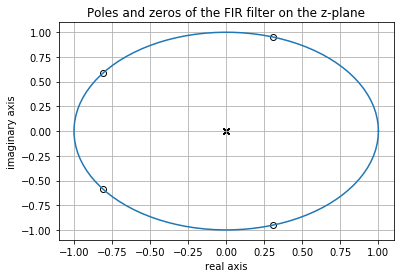

In [7]:
print('poles =', H_z.poles)
print('zeros =', H_z.zeros)

# plot the poles and zeros
plt.scatter(H_z.poles.real, H_z.poles.imag, marker='x', color='k')
plt.plot(H_z.zeros.real, H_z.zeros.imag, marker='o', color='k', fillstyle='none', linestyle='none')

# plot the unit circle
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.exp(1j*theta).real, np.exp(1j*theta).imag)

plt.xlabel('real axis')
plt.ylabel('imaginary axis')
plt.title('Poles and zeros of the FIR filter on the z-plane')
plt.grid()

## 4.3.3 Using data stored in a file as input to a filter

In the Python or MATLB environment, you can carry out many filter applications,  
but those applications do not happen in real time, the data must be collected and saved in a file  
  
We want to learn how to perform filtering in real time, in the lab with Arduino,  
but first, let's look at how we may apply a filter using Python  

In python, you can test a filter using the lti or dlti object and its output method  
  
The code cell below, creates a signal in variable x_t, with noise for testing  
You could very easily have read data into variable, x_t, from a file  
A file generated by an experiment you did in the lab  

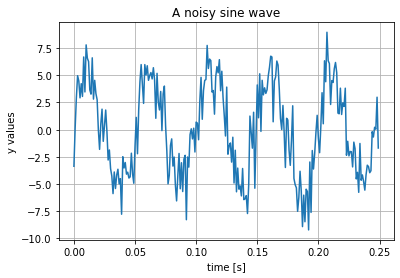

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# create a 5 periods of a 20Hz sine wave, sampled at 1000 samples/sec
# we assume a sampling rate of 1000 samples/sec because that is how we created our dlti object
t = np.arange(0, 0.25, 0.001)

# 20Hz sine wave with amplitude of 5
A = -5j
s = 1j*2*np.pi*20
x_clean_t = (A/2)*np.exp(s*t)+(np.conjugate(A)/2)*np.exp(np.conjugate(s)*t)

# create noise 
x_noise_t = np.random.normal(0, 2, len(t))

# create a noisy input signal 
x_t = x_clean_t.real + x_noise_t

plt.plot(t, x_t)
plt.xlabel('time [s]')
plt.ylabel('y values')
plt.title('A noisy sine wave')
plt.grid()

### 4.3.3.1 Continuous time filter

Python Scipy has a method that goes with an lti object,  
that allows you to calculate an output signal based on an arbitrary input signal  
Normally we need to find the Laplace transform of the input signal, like an impulse or step input  
With this method, the signal may be arbitrary and you are not forced to find the Laplace transform   
  
You must pass the lti object into the method, as well as the input signal and time points associated with the input signal  
The method will return the output signal  
[Output method of the lti object](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html)  
  
The code cell below computes the output of our continuous time filter

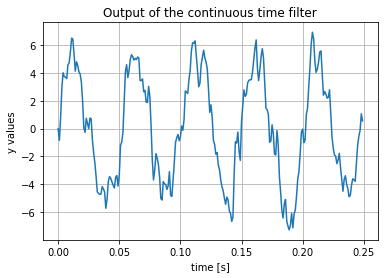

In [9]:
tout, yout, xout = sig.lsim(H_s, U=x_t, T=t)

plt.plot(tout, yout)
plt.xlabel('time [s]')
plt.ylabel('y values')
plt.title('Output of the continuous time filter')
plt.grid()

### 4.3.3.2 Discrete time filter

You can see the continuous time filter did not do a very good job of filtering the noise  
However, you could easily increase the capacitor by a factor of 10, to lower the cut-off frequency  
You would see much better filtering from the RC circuit in that case  
  
For this example, we chose the cut-off to be 1000 radians/sec to somewhat match  
the performance of our FIR filter, a running average of the last 5 samples  
Of course, you could average more points than the last 5, reducing the cut-off frequency of the FIR filter  
You could also use weighted averages, counting newer or older samples with more weight to impact the Bode plot  
In fact Scipy signal has built-in methods that allow you to design FIR filters  
These are returned as coefficients or weights required for each of the samples averaged in the system  
For this course we are just showing you simple filters, you will need to take a  
digital signal processing (DSP) course to learn more about how to design FIR filters  
[FIR filter design](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firls.html) 
[FIR filter design](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) 
[FIR filter design](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin2.html)  
  
The dlti object also requires you pass in the input signal and sampling times, as well as the dlti object  
  
The code cell below shows the details of using the dlti output method  
[Ouput method of the dlti object](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlsim.html#scipy.signal.dlsim)

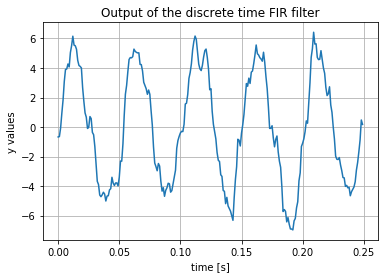

In [10]:
tout, yout = sig.dlsim(H_z, u=x_t, t=t)

plt.plot(tout, yout)
plt.xlabel('time [s]')
plt.ylabel('y values')
plt.title('Output of the discrete time FIR filter')
plt.grid()

## 4.3.4 Implementing a FIR filter in real time

When you are working in the lab, you may want the discrete time signal to be sampled  
and then filtered and put back out as a voltage signal  
You may do this because you are creating a control system, or because you want the result in real time  
For example, you may be listening to a ska band with a microphone, filtering, and hearing it with headphones  
all in real time  
  
For the code cell below, we will get the input data from the noisy array we created in the previous example  
We will call the array analogRead  
Any time you see analogRead in the code cell below, that is where the Arduino would be taking a sample of an analog signal  
Arduino would use the analogRead() method  
We will also create an array called analogWrite  
Again, we will assign a value to the analogWrite array, but Arduino would use its analogWrite() method to output to its DAC  
You would want to make sure the Arduino is using a True Analog Output pin  
  
The code cell below performs the same filtering as the previous example, but in real time if run on an Arduino  

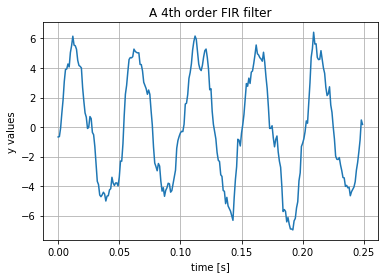

In [11]:
analogRead = x_t
analogWrite = []

x_k1 = 0
x_k2 = 0
x_k3 = 0
x_k4 = 0

for k in range(len(analogRead)): # this is the void loop() method in Arduino
    
    x_k = analogRead[k] # read the input value from the ADC unit
    
    y_k = 0.2*x_k
    y_k = y_k + 0.2*x_k1
    y_k = y_k + 0.2*x_k2
    y_k = y_k + 0.2*x_k3
    y_k = y_k + 0.2*x_k4

    analogWrite.append(y_k) # write the output value to the DAC unit
    
    # this pipeline is 4 elements deep
    x_k4 = x_k3
    x_k3 = x_k2
    x_k2 = x_k1
    x_k1 = x_k
    
    # you need the Arduino delay method to set the sampling period to 1 millisecond
    # delayMicroseconds(1000);
    
plt.plot(t, analogWrite)
plt.xlabel('time [s]')
plt.ylabel('y values')
plt.title('A 4th order FIR filter')
plt.grid()